# BFS and DFS

Breadth-First Search (BFS) and Depth-First Search (DFS) are the two fundamental graph traversal algorithms.

**BFS:** Explore all neighbors before going deeper  
**DFS:** Go as deep as possible before backtracking

Same problem, completely different behavior.

## The Core Difference

Imagine you're in a maze. You reach a junction with 3 paths:

**BFS approach:** "I'll check what's one step down ALL three paths first, then explore further."

**DFS approach:** "I'll pick path 1 and follow it until I hit a dead end, THEN come back and try path 2."

The difference is just **what you explore next** - neighbors first (BFS) or depth first (DFS).

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import deque
from IPython.display import clear_output
import time

%matplotlib inline

In [2]:
class Grid:
    def __init__(self, width, height, obstacles, start, goal):
        self.width = width
        self.height = height
        self.obstacles = set(obstacles)
        self.start = start
        self.goal = goal
    
    def neighbors(self, pos):
        x, y = pos
        candidates = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]
        return [
            (nx, ny) for nx, ny in candidates
            if 0 <= nx < self.width and 0 <= ny < self.height
            and (nx, ny) not in self.obstacles
        ]

print("Grid ready")

Grid ready


## Breadth-First Search (BFS)

### How It Works

BFS explores in "waves" radiating outward from the start.

**The Algorithm:**

1. Put start node in a queue
2. While queue is not empty:
   - Take the FIRST node out (the one added earliest)
   - Mark it as visited
   - If it's the goal, we're done!
   - Add all its unvisited neighbors to the BACK of the queue
3. Repeat

**Why a queue?** Queue is FIFO (First In First Out). This ensures we visit nodes in order of distance from start.

### Step-by-Step Example

```
Start at A, looking for F

Step 1: Queue = [A]
  Visit A, add neighbors B and C
  Queue = [B, C]

Step 2: Queue = [B, C]
  Visit B (added first), add neighbors D and E
  Queue = [C, D, E]

Step 3: Queue = [C, D, E]
  Visit C, add neighbor F
  Queue = [D, E, F]

Step 4: Queue = [D, E, F]
  Visit D (no new neighbors)
  Queue = [E, F]

Step 5: Queue = [E, F]
  Visit E (no new neighbors)
  Queue = [F]

Step 6: Queue = [F]
  Visit F - FOUND IT!
```

Notice: We visited nodes in order A → B → C → D → E → F

All distance-1 nodes (B, C) before distance-2 nodes (D, E, F).

In [3]:
def bfs(grid):
    """
    BFS using queue
    Returns path and visited nodes in order
    """
    queue = deque([grid.start])
    came_from = {grid.start: None}
    visited_order = []
    
    while queue:
        current = queue.popleft()  # FIFO - first node added is first processed
        visited_order.append(current)
        
        if current == grid.goal:
            # Reconstruct path
            path = []
            while current is not None:
                path.append(current)
                current = came_from[current]
            return path[::-1], visited_order
        
        for neighbor in grid.neighbors(current):
            if neighbor not in came_from:
                queue.append(neighbor)
                came_from[neighbor] = current
    
    return None, visited_order

print("BFS ready")

BFS ready


### BFS Implementation Breakdown


**Step 1: Setup**
```python
queue = deque([grid.start])  # Start with source node
came_from = {grid.start: None}  # Track where we came from (for path reconstruction)
```

**Step 2: Main Loop**
```python
while queue:  # While there are nodes to explore
    current = queue.popleft()  # Get OLDEST node (FIFO)
```

**Step 3: Check if Done**
```python
    if current == grid.goal:
        # Reconstruct path by following came_from backwards
        return path
```

**Step 4: Explore Neighbors**
```python
    for neighbor in grid.neighbors(current):
        if neighbor not in came_from:  # Haven't seen this node yet
            queue.append(neighbor)  # Add to BACK of queue
            came_from[neighbor] = current  # Remember how we got here
```

**Why `came_from`?** We need to reconstruct the path. If we reached node X from node Y, then `came_from[X] = Y`.

## Depth-First Search (DFS)

### How It Works

DFS commits to a path and follows it as far as possible before backtracking.

**The Algorithm:**

1. Put start node on a stack
2. While stack is not empty:
   - Take the TOP node off (the one added most recently)
   - If already visited, skip it
   - Mark it as visited
   - If it's the goal, we're done!
   - Add all its unvisited neighbors to the stack
3. Repeat

**Why a stack?** Stack is LIFO (Last In First Out). This makes us immediately explore the most recently discovered node.

### Step-by-Step Example

Same graph as BFS example:

```
Start at A, looking for F

Step 1: Stack = [A]
  Visit A, add neighbors B and C
  Stack = [B, C]  (C on top)

Step 2: Stack = [B, C]
  Pop C (on top), add neighbor F
  Stack = [B, F]

Step 3: Stack = [B, F]
  Pop F (on top) - FOUND IT!
```

Notice: We visited A → C → F

We went deep (A→C→F) instead of exploring all neighbors at each level.

### DFS Can Find Different Paths

If we had added neighbors in different order:

```
Step 1: Stack = [A]
  Visit A, add neighbors C and B
  Stack = [C, B]  (B on top)

Step 2: Stack = [C, B]
  Pop B, add neighbors D and E
  Stack = [C, D, E]

Step 3: Continue until we hit F...
```

DFS path depends on order of neighbor exploration. BFS always visits by distance.

In [4]:
def dfs(grid):
    """
    DFS using stack (or recursion, but iterative here)
    """
    stack = [grid.start]
    came_from = {grid.start: None}
    visited_order = []
    
    while stack:
        current = stack.pop()  # LIFO - last node added is first processed
        
        if current in visited_order:
            continue
        
        visited_order.append(current)
        
        if current == grid.goal:
            path = []
            while current is not None:
                path.append(current)
                current = came_from[current]
            return path[::-1], visited_order
        
        for neighbor in grid.neighbors(current):
            if neighbor not in came_from:
                stack.append(neighbor)
                came_from[neighbor] = current
    
    return None, visited_order

print("DFS ready")

DFS ready


### DFS Implementation Breakdown

**Step 1: Setup**
```python
stack = [grid.start]
came_from = {grid.start: None}
visited_order = []  # Track exploration order
```

**Step 2: Main Loop**
```python
while stack:
    current = stack.pop()  # Get NEWEST node (LIFO)
    
    if current in visited_order:  # Skip if already processed
        continue
    visited_order.append(current)
```

**Step 3: Check Goal and Explore**
```python
    if current == grid.goal:
        return path
    
    for neighbor in grid.neighbors(current):
        if neighbor not in came_from:
            stack.append(neighbor)  # Add to TOP
            came_from[neighbor] = current
```

**Key Difference from BFS:**
- `stack.pop()` instead of `queue.popleft()`
- Need to check if already visited (stack can have duplicates)

### The ONLY Real Difference

```python
# BFS
current = queue.popleft()  # Oldest first

# DFS  
current = stack.pop()  # Newest first
```

This one line changes everything.

In [5]:
def visualize(grid, path, visited, title):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(0, grid.width)
    ax.set_ylim(0, grid.height)
    ax.set_aspect('equal')
    
    # Draw cells
    for x in range(grid.width):
        for y in range(grid.height):
            color = 'white'
            if (x, y) in grid.obstacles:
                color = 'black'
            elif (x, y) in visited:
                # Color by visit order to show exploration pattern
                visit_idx = visited.index((x, y))
                intensity = visit_idx / len(visited)
                color = plt.cm.Blues(0.3 + intensity * 0.5)
            
            rect = patches.Rectangle((x, y), 1, 1,
                                     linewidth=1, edgecolor='gray',
                                     facecolor=color)
            ax.add_patch(rect)
            
            # Show visit order
            if (x, y) in visited and (x, y) not in [grid.start, grid.goal]:
                order = visited.index((x, y)) + 1
                ax.text(x+0.5, y+0.5, str(order), ha='center', va='center',
                       fontsize=8, color='darkblue')
    
    # Draw path
    if path:
        for i in range(len(path) - 1):
            x1, y1 = path[i]
            x2, y2 = path[i+1]
            ax.arrow(x1+0.5, y1+0.5, x2-x1, y2-y1,
                    head_width=0.2, head_length=0.2,
                    fc='red', ec='red', linewidth=2.5, length_includes_head=True)
    
    # Start and goal
    ax.text(grid.start[0]+0.5, grid.start[1]+0.5, 'S',
           ha='center', va='center', fontsize=20, fontweight='bold', color='green')
    ax.text(grid.goal[0]+0.5, grid.goal[1]+0.5, 'G',
           ha='center', va='center', fontsize=20, fontweight='bold', color='red')
    
    ax.set_xticks(range(grid.width))
    ax.set_yticks(range(grid.height))
    ax.grid(True, alpha=0.3)
    ax.set_title(f'{title} | Path: {len(path)} | Explored: {len(visited)}',
                fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

print("Visualization ready")

Visualization ready


## Visualizing the Difference

Run the code below. The numbers in each cell show the order nodes were visited.

**BFS pattern:** Numbers increase in concentric circles - all distance-1 nodes, then all distance-2, etc.

**DFS pattern:** Numbers follow long snaking paths - goes deep before exploring sideways.

Same maze, same goal, completely different exploration pattern.

Running BFS...


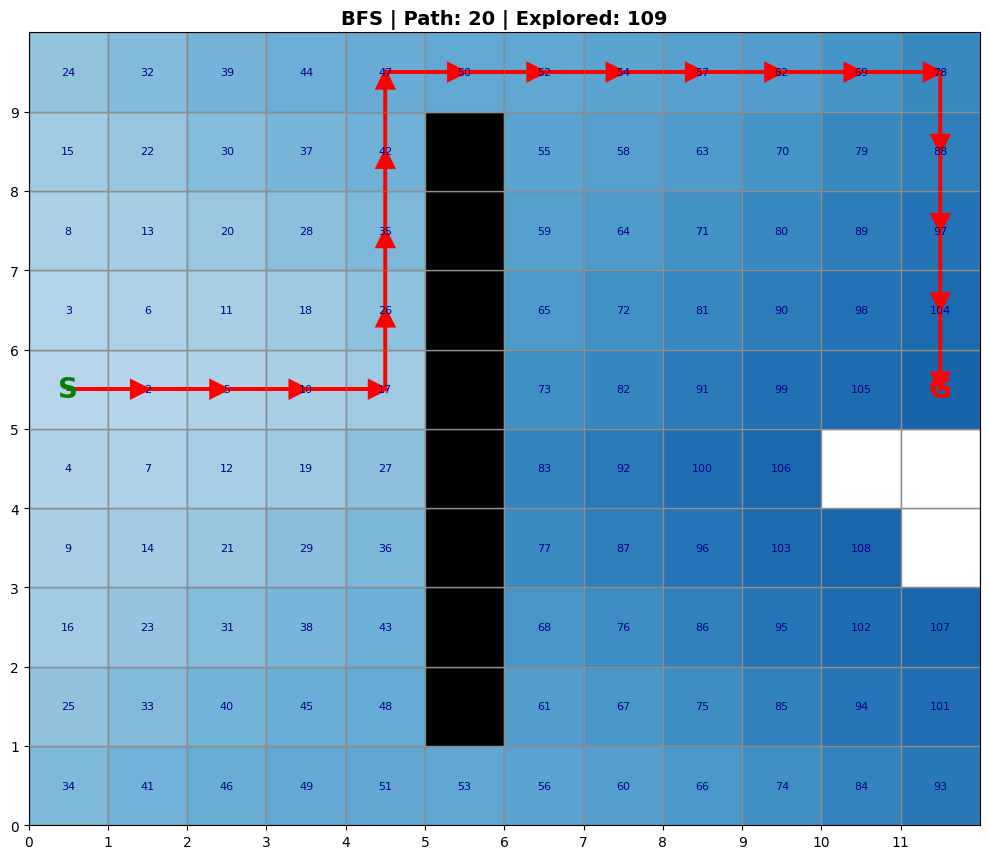


Running DFS...


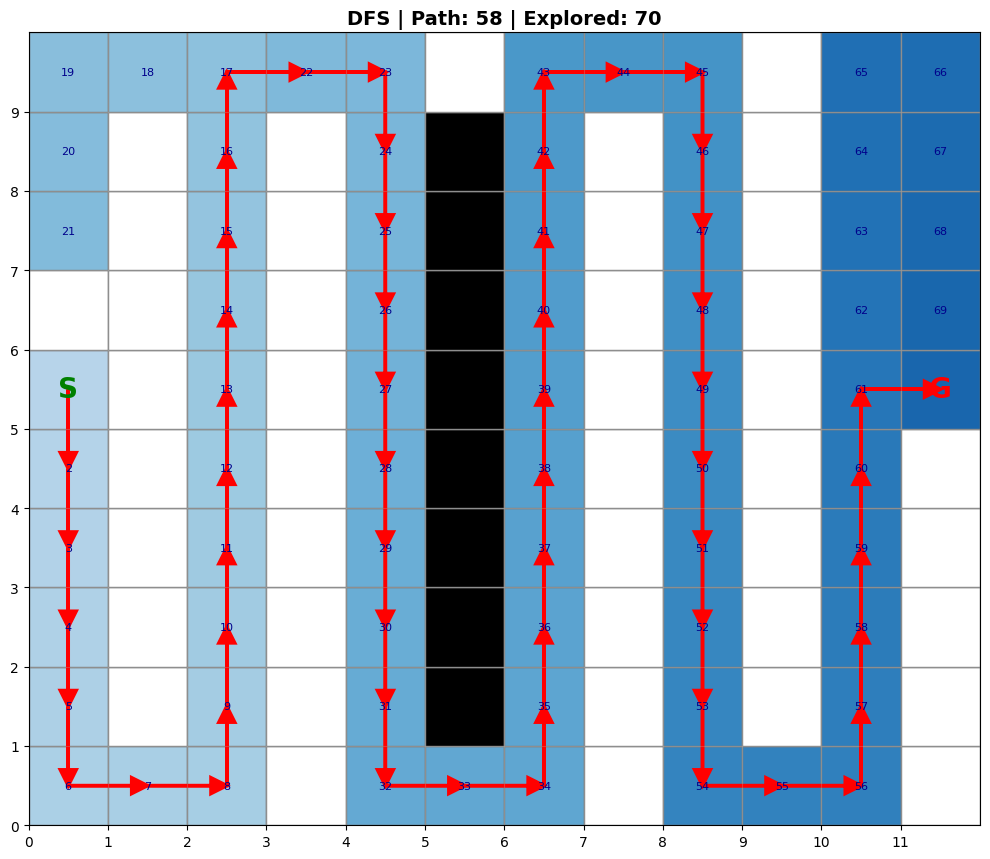

In [6]:
# Create maze
obstacles = [(5, y) for y in range(1, 9)]
grid = Grid(12, 10, obstacles, (0, 5), (11, 5))

print("Running BFS...")
path_bfs, visited_bfs = bfs(grid)
visualize(grid, path_bfs, visited_bfs, "BFS")

print("\nRunning DFS...")
path_dfs, visited_dfs = dfs(grid)
visualize(grid, path_dfs, visited_dfs, "DFS")

## What Just Happened?

Look at the visit numbers:

**BFS pattern:**
- Visits 1-4 are all around the start
- Visits 5-8 are one step further out
- Expands like ripples in water
- Path length is shortest possible

**DFS pattern:**
- Visit 1 might be at start
- Visit 2 might be far away (picked a direction and ran with it)
- Follows winding paths
- Path might be longer than necessary

**The numbers don't lie:** BFS explores systematically by distance. DFS commits to directions.

### Why BFS Finds Shortest Path

In an unweighted graph, BFS visits nodes in order of distance from start:
- Distance 0: Start node
- Distance 1: All neighbors of start
- Distance 2: All nodes 2 steps away
- ...

When BFS first reaches the goal, it MUST be via the shortest path. No shorter path exists because BFS already checked all shorter distances.

### Why DFS Doesn't

DFS might find the goal down a long winding path, completely missing a short direct route it hasn't explored yet.

## Extreme Case: No Obstacles

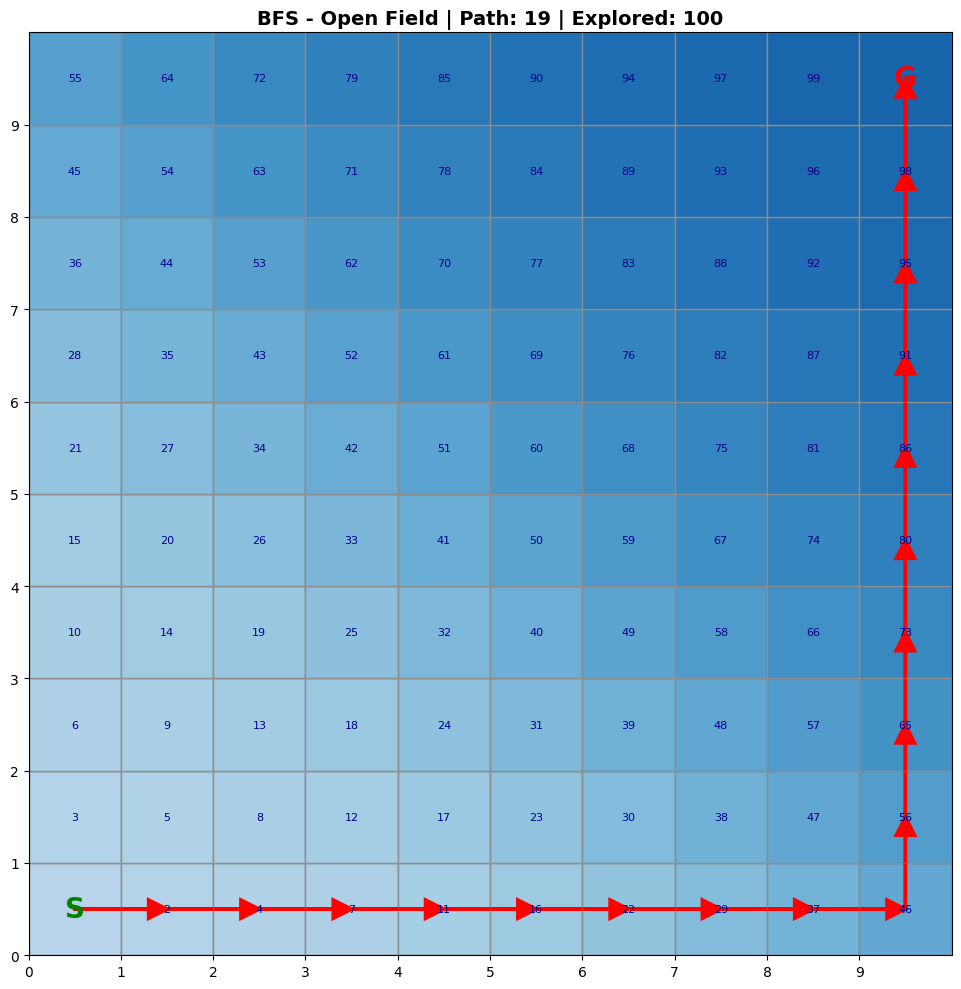

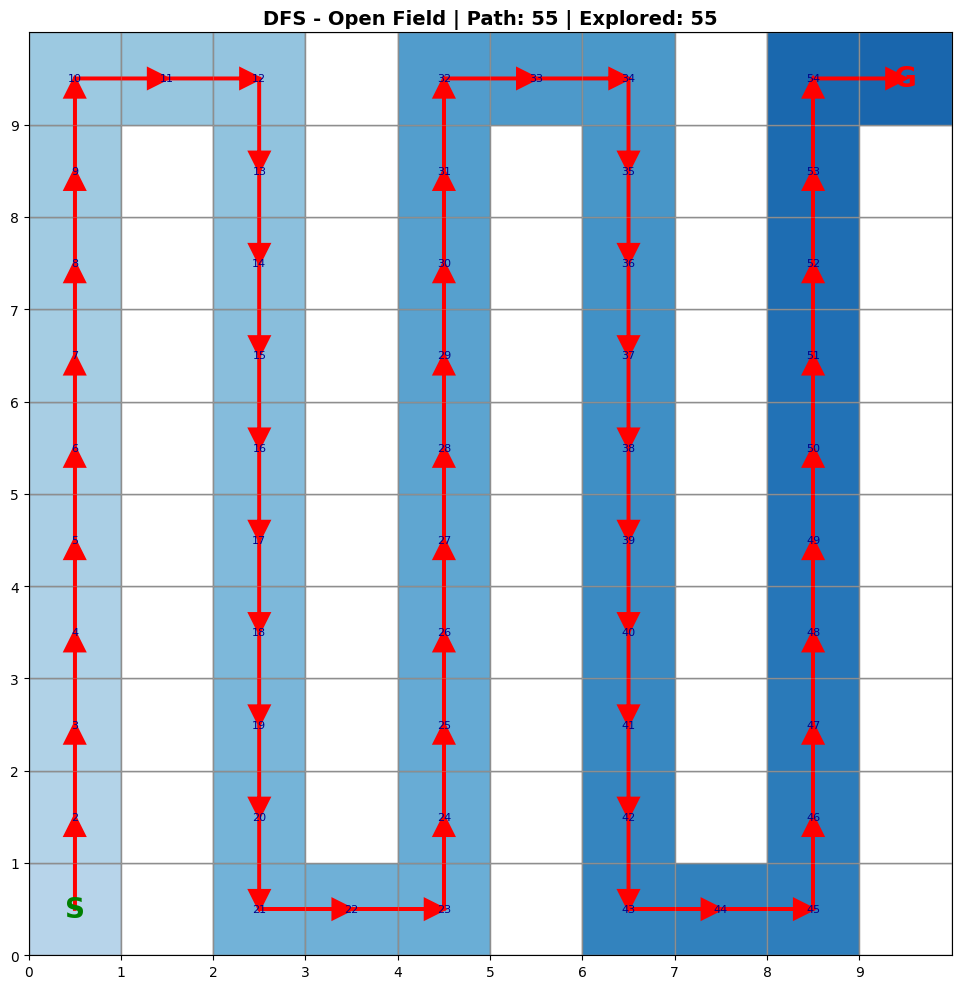

BFS explored 100 nodes, path length 19
DFS explored 55 nodes, path length 55


In [7]:
# Open field - no obstacles
grid_open = Grid(10, 10, [], (0, 0), (9, 9))

path_bfs, visited_bfs = bfs(grid_open)
visualize(grid_open, path_bfs, visited_bfs, "BFS - Open Field")

path_dfs, visited_dfs = dfs(grid_open)
visualize(grid_open, path_dfs, visited_dfs, "DFS - Open Field")

print(f"BFS explored {len(visited_bfs)} nodes, path length {len(path_bfs)}")
print(f"DFS explored {len(visited_dfs)} nodes, path length {len(path_dfs)}")

## When to Use Which?

### Use BFS when:
- Need shortest path (unweighted graphs)
- Solution is likely close to start
- Want to explore level-by-level
- Examples: social network connections, word ladder puzzles

### Use DFS when:
- Just need any path (don't care if shortest)
- Solution is likely deep in the tree
- Memory constrained (DFS uses less memory)
- Checking connectivity, topological sorting
- Examples: maze solving, game trees, detecting cycles

### Key Differences:

| | BFS | DFS |
|---|---|---|
| **Data Structure** | Queue (FIFO) | Stack (LIFO) |
| **Shortest Path** | Yes (unweighted) | No |
| **Memory** | O(width) | O(depth) |
| **Time** | O(V + E) | O(V + E) |
| **Exploration** | Layer by layer | Deep dive |

Both visit all reachable nodes, just in different order.